In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') # iris
pca_painter = PaintPCA(alldata)

Variance explained by first 2 principal components: [0.96549485 0.03450515]


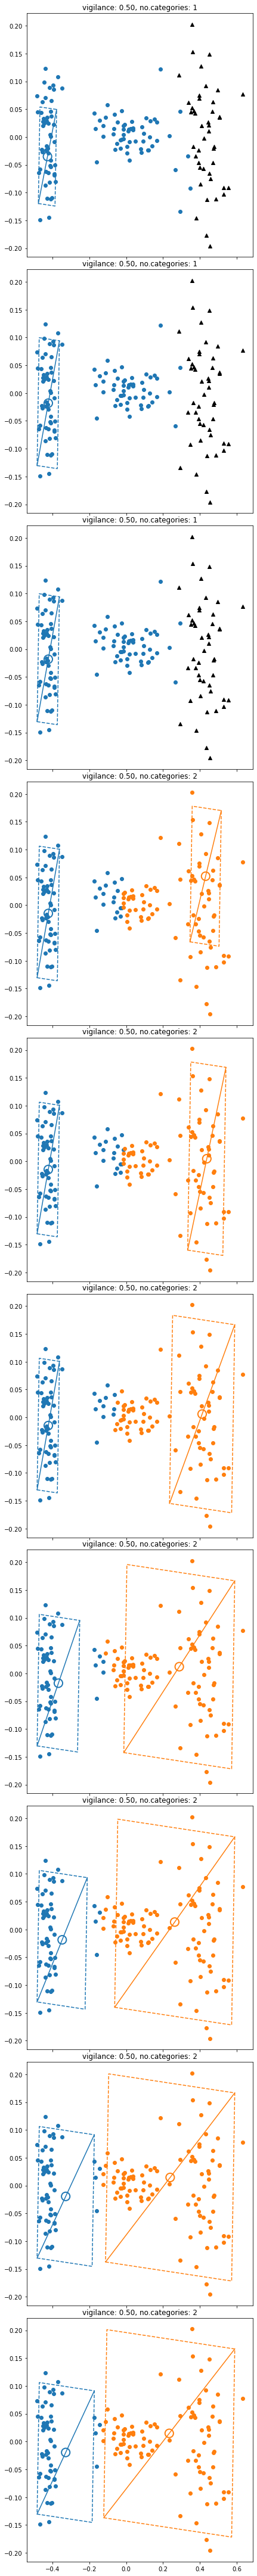

In [4]:
no_epoch = 10
fig, axs = plt.subplots(no_epoch, 1,
                        figsize = (6, 6 * no_epoch), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
#pca_painter.scatter(axs[0], label_true)
#axs[0].set_title("true data")

# init
rho=0.5
net = FuzzyART(alpha=0.5)

for ax, data in zip(axs, alldata.reshape(no_epoch, -1, 2)):    
    
    # train
    net.train(data) # each epoch, all data is shuffled
    label_pred = net.test(alldata).astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
# save fig
simname = 'var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
#savefigure_datetime(fig, simname, dirname)

